In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import openturns as ot
import matplotlib.pyplot as plt
ot.RandomGenerator.SetSeed(0)

In [3]:
from matplotlib import rc
rc('font', **{'family': 'Libertine'})
rc('text', usetex=True)
rc('text', usetex=True)
plt.rcParams.update({'text.latex.preamble': r'\usepackage{amsfonts}'})
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=16)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

In [4]:
scaling = 10
g = ot.SymbolicFunction(['x'], ['(x ^ 2)'])
X = ot.Normal(4., 1.) 
Y = (X * X) 
x_plot = np.arange(1., 7, 0.05).reshape(-1, 1)
y_plot = np.arange(-1, 50, 0.05).reshape(-1, 1)

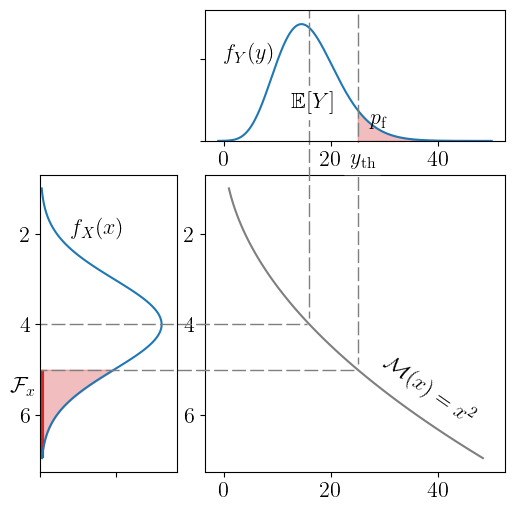

In [5]:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(6, 6, hspace=0.7, wspace=0.5)
main_plot = fig.add_subplot(grid[2:, 2:])
left_plot = fig.add_subplot(grid[2:, :2], xticklabels=[], sharey=main_plot)
top_plot = fig.add_subplot(grid[:2, 2:], yticklabels=[], sharex=main_plot)
# Plots
left_plot.plot(X.computePDF(x_plot), x_plot, color="C0")
left_plot.invert_yaxis()
top_plot.plot(y_plot, Y.computePDF(y_plot), color="C0")
main_plot.plot(g(x_plot), x_plot, color='C7')
# Hide ticks
#main_plot.tick_params(axis='y', which='both', labelleft=False)
#main_plot.tick_params(axis='x', which='both', labelbottom=False)
# Window limits 
left_plot.set_xlim(0., 0.45)
top_plot.set_ylim(0., 0.08)
# Grids
#main_plot.grid(True)
#left_plot.grid(True)
#top_plot.grid(True)

# Lines
col = "C7"
left_plot.axhline(y=4., xmin=0, xmax=1.95, clip_on=False, linestyle=(5, (10, 3)), color=col, linewidth=1)
top_plot.axvline(x=4**2, ymin=-1.35, ymax=1., clip_on=False, linestyle=(5, (10, 3)), color=col, linewidth=1)
left_plot.axhline(y=5., xmin=0, xmax=2.3, clip_on=False, linestyle=(5, (10, 3)), color=col, linewidth=1)
top_plot.axvline(x=5**2, ymin=-1.7, ymax=1., clip_on=False, linestyle=(5, (10, 3)), color=col, linewidth=1)
# Filled areas
x_fail = np.arange(5, 7, 0.05).reshape(-1, 1)
y_fail = np.arange(25, 50, 0.05).reshape(-1, 1)
top_plot.fill_between(y_fail.flatten(), np.array(Y.computePDF(y_fail)).flatten(), 0, alpha=0.3, color="C3")
left_plot.fill_between(np.array(X.computePDF(x_fail)).flatten(), x_fail.flatten(), 5, alpha=0.3, color="C3")
left_plot.plot([0.006]*2, [5.05, 6.9], linewidth=3., color="C3", zorder=1)
# Text
top_plot.text(0, 0.05,"$f_Y(y)$")
top_plot.text(12.5, 0.02,"$\mathbb{E}[Y]$", backgroundcolor="w")
top_plot.text(23.5, -0.014,"$y_{\mathrm{th}}$", backgroundcolor="w")
top_plot.text(27, 0.01,"$p_\mathrm{f}$")
main_plot.text(29, 6.2, "$\mathcal{M}(x)=x^2$", rotation=-35)
left_plot.text(0.1, 2, "$f_X(x)$")
left_plot.text(-0.1, 5.5, "$\mathcal{F}_x$")
plt.savefig("figures/1D_reliability.png", bbox_inches='tight', dpi=300);